# COMP5318 - Machine Learning and Data Mining 

## Tutorial 10 - Perceptron and Simple Neural Network

**Semester 2, 2020**

**Objectives:**

* To learn about Perceptron
* To learn about simple NN

**Instructions:**
* Exercises to be completed on IPython notebook such as: 
   * Ipython 3 (Jupyter) notebook installed on your computer http://jupyter.org/install (you need to have Python installed first https://docs.python.org/3/using/index.html )
   * Web-based Ipython notebooks such as Google Colaboratory https://colab.research.google.com/ 
   
* If you are using Jupyter intalled on your computer, Go to File->Open. Drag and drop "lab11.ipynb" file to the home interface and click upload. 
* If you are using Google Colaboratory, Click File->Upload notebook, and and upload "lab11.ipynb" file
* Complete exercises in "lab10.ipynb".
* To run the cell you can press Ctrl-Enter or hit the Play button at the top.
* Complete all exercises marked with **TODO**.
* Save your file when you are done with the exercises, so you can show your tutor next week.


Lecturers: Nguyen Hoang Tran 

Tutors: Canh Dinh, Chen Chen, Claire Hardgrove, Fengxiang He, Henry Weld, Yixuan Zhang, Zhiyi Wang, Thomas Selvaraj.

## 1. Perceptron

In [2]:
import numpy as np
import matplotlib.pylab as pl
import math
%matplotlib inline

Loading data

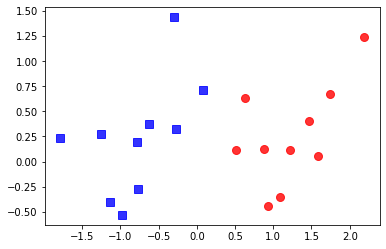

In [3]:
from __future__ import print_function 
import numpy as np 
import matplotlib.pyplot as plt
np.random.seed(2)

means = [[-1, 0], [1, 0]]
cov = [[.3, .2], [.2, .3]]
N = 10
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)

X = np.concatenate((X0, X1), axis = 0)
y = np.concatenate((np.ones(N), -1*np.ones(N)))

#fig,axs=plt.subplots(nrows,ncols,figsize=(width,height))
plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
plt.show()

This data set has 2 classes in total. We will use perceptron algorithm to make a decision boundary for this dataset.

In perception, we minimizes the number of errors on the training dataset follows:

$$ \epsilon = \sum_n 1_{[y_n \neq sign(w^tx_n)]}$$

**Algorithm:**

For a randomly chosen data point $(x_n, y_n)$ make small changes to $w$ so that : $y_n = sign(w^tx_n)$:

2 case:
- If $y_n = sign(w^tx_n)$: Do nothing
- If $y_n \neq sign(w^tx_n)$: update w : $w_{t+1} = w_{t} + y_nx_n$ => we only update $w$ for misclassified point. The update process will be stopped when there is no misclassified point.

**Create Perception Algorithm from scratch:**

In [4]:
def predict(w, X):    
    '''
    predict label of each row of X, given w 
    '''
    return np.sign(X.dot(w))

def perceptron(X, y, w_init):
    w = w_init
    w_hist = [w]
    mis_points = [] # list of misclassified points
    while True:
        pred = predict(w, X)
        mis_idxs = np.where(np.equal(pred, y) == False)[0]
        num_mis = mis_idxs.shape[0]
        if num_mis == 0:
            return (w_hist, mis_points)
        # random pick one misclassified point 
        random_id = np.random.choice(mis_idxs, 1)[0]
        mis_points.append(random_id)
        w = w + y[random_id]*X[random_id]
        w_hist.append(w)

Make the prediction

In [5]:
np.random.seed(73)
Xbar = np.concatenate((np.ones((2*N, 1)), X), axis = 1)
d = Xbar.shape[1]
w_init = np.random.randn(d)
w_hist, m = perceptron(Xbar, y, w_init)

Visualize the change of boundary during the learning processs depends on number of update 

In [6]:
from matplotlib.backends.backend_pdf import PdfPages    
def draw_line(plt, w):
    w0, w1, w2 = w[0], w[1], w[2]
    if w2 != 0:
        x11, x12 = -100, 100
        return plt.plot([x11, x12], [-(w1*x11 + w0)/w2, -(w1*x12 + w0)/w2], 'k')
    else:
        x10 = -w0/w1
        return plt.plot([x10, x10], [-100, 100], 'k')

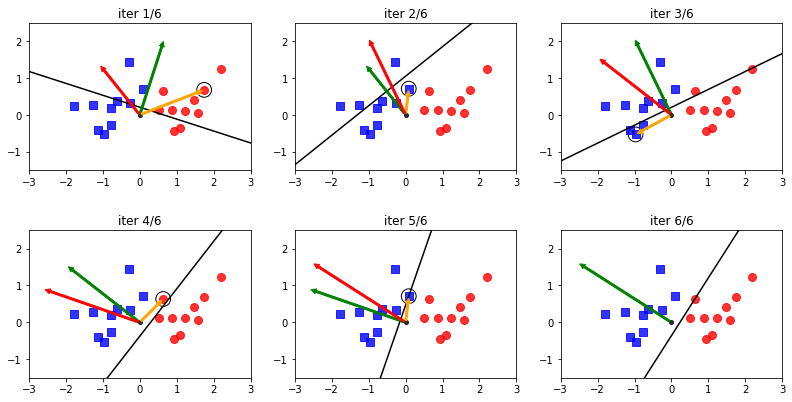

In [7]:
ncols = m 
if(len(m) >= 3):
    ncols = 3
nrows = math.ceil(len(m)/3)
width = 4.5*ncols 
height = 3.5*nrows

filename = 'pla_visualize1.pdf'
with PdfPages(filename) as pdf: 
    plt.close('all')
    fig,axs=plt.subplots(nrows,ncols,figsize=(width,height))
    ids = range(len(m)+1)
    for i, k in enumerate(ids[1:]):
        #print("i,k",i,k)
        r = i//ncols 
        c = i%ncols 
        str0 = 'iter {}/{}'.format(i+1, len(ids)-1)
        if(nrows > 1):
            temp = axs[r, c]
        else:
            temp = axs[c]
        if nrows > 1:
            temp.set_title(str0)
            temp.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
            temp.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)
            temp.plot(0, 0, 'k.', markersize = 8, alpha = .8)
            temp.axis([0 , 6, -2, 4])
            draw_line(temp, w_hist[k])
            wx, wy = w_hist[k][1], w_hist[k][2]
            temp.annotate('', xy=(wx, wy), xytext=(0, 0),arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'green', fc = 'green'))
        if k < nrows*ncols:
            
            # get misclassified point
            xmis = X[m[k], 0] 
            ymis = X[m[k], 1]
            
            #circle around the misclassified point
            circle = plt.Circle((xmis, ymis), 0.2, color='k', fill = False)
            temp.add_artist(circle)
            
            #vector to xmis
            temp.annotate('', xy=(xmis, ymis), xytext=(0, 0),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'orange', fc = 'orange'))

            if m[k] > 10:
                #New w if the misclassified point is in red 
                temp.annotate('', xytext=(0, 0), xy=(wx - xmis, wy-ymis),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'red', fc = 'red'))
            else: # the misclassified point is in blue
                temp.annotate('', xytext=(0, 0), xy=(wx + xmis, wy+ymis),
                        arrowprops=dict(arrowstyle="simple", connectionstyle="arc3", ec = 'red', fc = 'red'))
                
        temp.axis('scaled')
        temp.axis([-3, 3, -1.5, 2.5])
    pdf.savefig(bbox_inches = 'tight')
    plt.show()

Blue points: Class 1, Red points: Class -1


**Green Vector** is $w_t$.

**Red Vertor** is $w_{t+1}$

The circled points are misclassified point ($x_i$)

**Orange Vector** is xi

- If $y_i = 1$ (blue), red vector = Sum(Green Vector, Orange Vector)
- If $y_i = −1$, red vector = Sub(Green Vector, Orange Vector)

## 2. Multilayer Neural Network and Backpropagation

Consider a dataset has multipel classes and does not have the linear bondary betwen classes

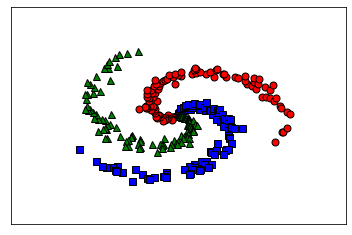

In [18]:
N = 100 # number of points per class
d0 = 2 # dimensionality
C = 3 # number of classes
X = np.zeros((N*C, d0)) # data matrix (each row = single example)
y = np.zeros(N*C, dtype='uint8') # class labels

for j in range(C):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
# lets visualize the data:
# plt.scatter(X[:N, 0], X[:N, 1], c=y[:N], s=40, cmap=plt.cm.Spectral)

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7, markeredgecolor = 'k');
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'ro', markersize = 7, markeredgecolor = 'k');
plt.plot(X[2*N:, 0], X[2*N:, 1], 'g^', markersize = 7, markeredgecolor = 'k');
# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
filename = 'EX.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
# plt.savefig('EX.png', bbox_inches='tight', dpi = 600)
plt.show()

 Consider a neural network with one hidden layer using Relu activation function and Softmax function at the end of the network
<img src="Network.png" alt="2 layers Network" title="2 layers Network" width="450" height="300" />

**Feedforward step**
$$ Z^{(1)} = W^{(1)T}X + B^{(1)} $$
$$ A^{(1)} = max(Z^{(1)},0) $$
$$ Z^{(2)} = W^{(2)T}A^{(1)} + B^{(2)} $$
$$ Y =A^{(2)}   = softmax(Z^{(2)},0) $$

$ A^{(1)} $ is output of the hidden layer after going through Relu activation function

$Y$ is final output after going through softmax  function

$W^{(1)}, B^{(1)}$ and $W^{(2)}, B^{(2)}$ are weight and bias of hidden layer and output layer respectively


**Backpropagation step**
$$ E^{(2)} = \nabla Z^{(2)} = \frac{1}{N} (A^{(2)} - Y) $$
$$ \nabla W^{(2)} = A^{(1)} E^{(2)T} , \nabla B^{(2)} = \sum_1^N e_n^{(2)} $$
$$ E^{(1)} =  W^{(2)} E^{(2)} \odot \nabla f(Z^{(1)}) $$
$$ \nabla W^{(1)} = A^{(0)} E^{(1)T}  = X E^{(1)T} , \nabla B^{(1)} = \sum_1^N e_n^{(1)} $$

In [19]:
def softmax_stable(Z):
    """
    Compute softmax values for each sets of scores in Z.
    each row of Z is a set of scores.    
    """
    e_Z = np.exp(Z - np.max(Z, axis = 1, keepdims = True))
    A = e_Z / e_Z.sum(axis = 1, keepdims = True)
    return A

def crossentropy_loss(Yhat, y):
    """
    Yhat: a numpy array of shape (Npoints, nClasses) -- predicted output 
    y: a numpy array of shape (Npoints) -- ground truth. We don't need to use 
    the one-hot vector here since most of elements are zeros. When programming 
    in numpy, we need to use the corresponding indexes only.
    """
    id0 = range(Yhat.shape[0])
    return -np.mean(np.log(Yhat[id0, y]))

def mlp_init(d0, d1, d2):
    """ 
    Initialize W1, b1, W2, b2 
    d0: dimension of input data 
    d1: number of hidden unit 
    d2: number of output unit = number of classes
    """
    W1 = 0.01*np.random.randn(d0, d1)
    b1 = np.zeros(d1)
    W2 = 0.01*np.random.randn(d1, d2)
    b2 = np.zeros(d2)
    return (W1, b1, W2, b2)

def mlp_predict(X, W1, b1, W2, b2):
    """
    Suppose that the network has been trained, predict class of new points. 
    X: data matrix, each ROW is one data point.
    W1, b1, W2, b2: learned weight matrices and biases 
    """
    Z1 = X.dot(W1) + b1    # shape (N, d1)
    A1 = np.maximum(Z1, 0) # shape (N, d1)
    Z2 = A1.dot(W2) + b2   # shape (N, d2)
    return np.argmax(Z2, axis=1)

def mlp_fit(X, y, W1, b1, W2, b2, eta):
    loss_hist = []
    for i in range(10000):
        # feedforward 
        Z1 = X.dot(W1) + b1       # shape (N, d1)
        A1 = np.maximum(Z1, 0)    # shape (N, d1)
        Z2 = A1.dot(W2) + b2      # shape (N, d2)
        Yhat = softmax_stable(Z2) # shape (N, d2)
        
        if i %1000 == 0: # print loss after each 1000 iterations
            loss = crossentropy_loss(Yhat, y)
            print("iter %d, loss: %f" %(i, loss))
            loss_hist.append(loss)

        # back propagation
        id0 = range(Yhat.shape[0])
        Yhat[id0, y] -=1 
        E2 = Yhat/N                # shape (N, d2)
        dW2 = np.dot(A1.T, E2)     # shape (d1, d2)
        db2 = np.sum(E2, axis = 0) # shape (d2,)
        E1 = np.dot(E2, W2.T)      # shape (N, d1)
        E1[Z1 <= 0] = 0            # gradient of ReLU, shape (N, d1)
        dW1 = np.dot(X.T, E1)      # shape (d0, d1)
        db1 = np.sum(E1, axis = 0) # shape (d1,)

        # Gradient Descent update
        W1 += -eta*dW1
        b1 += -eta*db1
        W2 += -eta*dW2
        b2 += -eta*db2
    return (W1, b1, W2, b2, loss_hist)

iter 0, loss: 1.098632
iter 1000, loss: 0.032188
iter 2000, loss: 0.023525
iter 3000, loss: 0.020604
iter 4000, loss: 0.018705
iter 5000, loss: 0.018382
iter 6000, loss: 0.017285
iter 7000, loss: 0.016904
iter 8000, loss: 0.016342
iter 9000, loss: 0.015456
training accuracy: 99.33 %


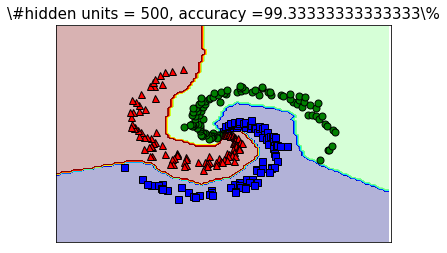

In [20]:
d0 = 2
d1 = h = 500 # size of hidden layer
d2 = C = 3
eta = 1 # learning rate
# initialize parameters randomly
(W1, b1, W2, b2) = mlp_init(d0, d1, d2)
(W1, b1, W2, b2, loss_hist) =mlp_fit(X, y, W1, b1, W2, b2, eta)

y_pred = mlp_predict(X, W1, b1, W2, b2)
acc = 100*np.mean(y_pred == y)
print('training accuracy: %.2f %%' % acc)

# Visualize results

xm = np.arange(-1.5, 1.5, 0.025)
xlen = len(xm)
ym = np.arange(-1.5, 1.5, 0.025)
ylen = len(ym)
xx, yy = np.meshgrid(xm, ym)
xx1 = xx.ravel().reshape(1, xx.size)
yy1 = yy.ravel().reshape(1, yy.size)


X0 = np.vstack((xx1, yy1)).T
Z = mlp_predict(X0, W1, b1, W2, b2)
Z = Z.reshape(xx.shape)

plt.clf()
CS = plt.contourf(xx, yy, Z, 200, cmap='jet', alpha = .3)

plt.plot(X[:N, 0], X[:N, 1], 'bs', markersize = 7, markeredgecolor = 'k');
plt.plot(X[N:2*N, 0], X[N:2*N, 1], 'go', markersize = 7, markeredgecolor = 'k');
plt.plot(X[2*N:, 0], X[2*N:, 1], 'r^', markersize = 7, markeredgecolor = 'k');

# plt.axis('off')
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])

plt.xlim(-1.5, 1.5)
plt.ylim(-1.5, 1.5)
plt.xticks(())
plt.yticks(())
str0 = '\#hidden units = ' + str(d1) + ', accuracy =' + str(acc) + '\%'
plt.title(str0, fontsize = 15)

filename = 'ex_res'+ str(d1) + '.pdf'
with PdfPages(filename) as pdf:
    pdf.savefig(bbox_inches='tight')
plt.show()